## Load Python Libraries

In [312]:
#Processing
import pandas as pd
import numpy as np
#Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#algorithms - as per algorithm see sections


In [313]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [314]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Load Data from CSV file, API or Kafka Stream

In [315]:
file_path = "C:\\Users\\Anastasiya\\Desktop\\Customertravel.csv"

In [316]:
#Save as a dataframe to view the data
data = pd.read_csv(file_path)

In [317]:
#Load to verify
data.head()
#Target variable is customer churn

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [318]:
data.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


## Exploratory Analysis

In [319]:
#check the data types and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [320]:
#Check column counts - See the header names
columns = list(data.columns)
print(f"Columns: {columns}")


Columns: ['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target']


In [321]:
#Check the missing values - no missing values - otherwise Clean missing values via imputing, fillna etc
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [322]:
#Sumamry stats for numerical columns. Average customer is 32 Years old with 2 services.
data.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


## Data Visualisation

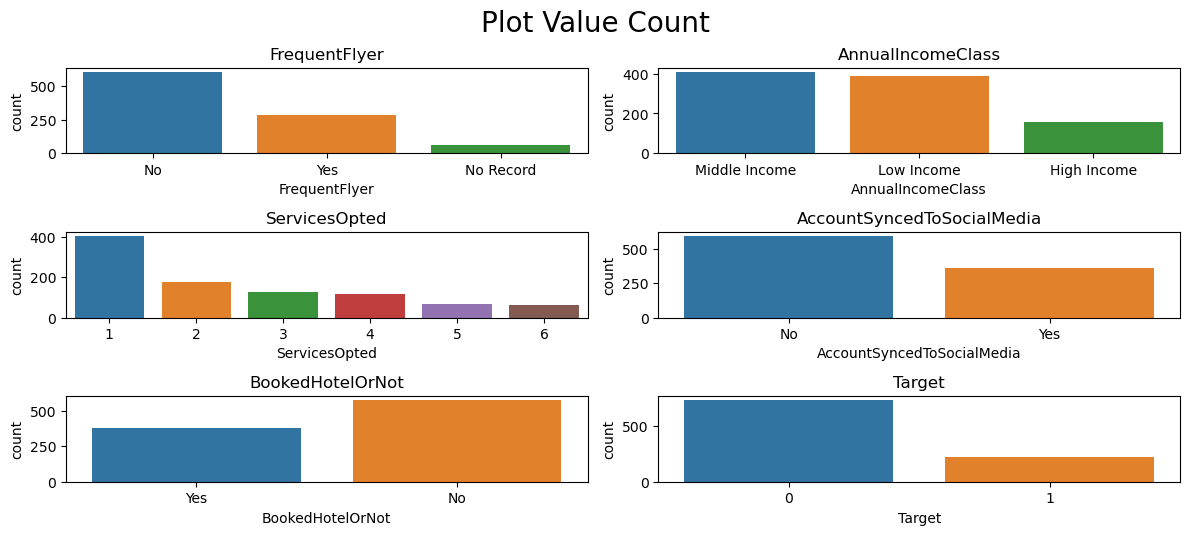

In [323]:
# Visualise the plot counts 
plt.figure(figsize=(12, 10))


for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20)
    sns.countplot(data=data, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [324]:
#check unique values of target
target_unique = data["Target"].unique()

class_counts = data["Target"].value_counts()

In [325]:
class_counts

Target
0    730
1    224
Name: count, dtype: int64

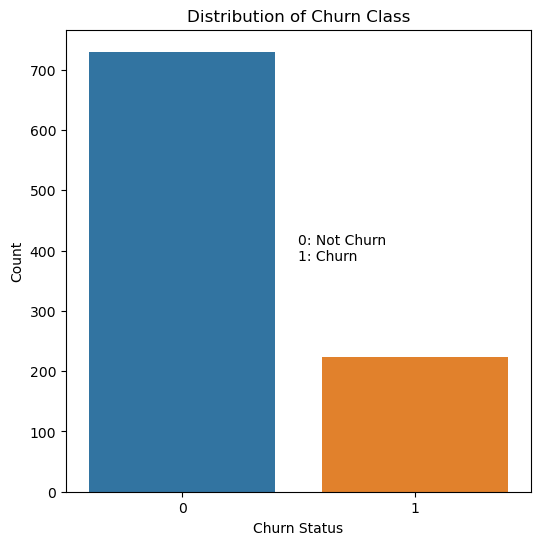

In [326]:
#Plot target to check for imbalance 

plt.figure(figsize=(6, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Distribution of Churn Class')

# Adding a key
plt.text(0.5, 0.5, '0: Not Churn\n1: Churn', fontsize=10, transform=plt.gca().transAxes)

plt.show()

In [327]:
catcol = ['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted','AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


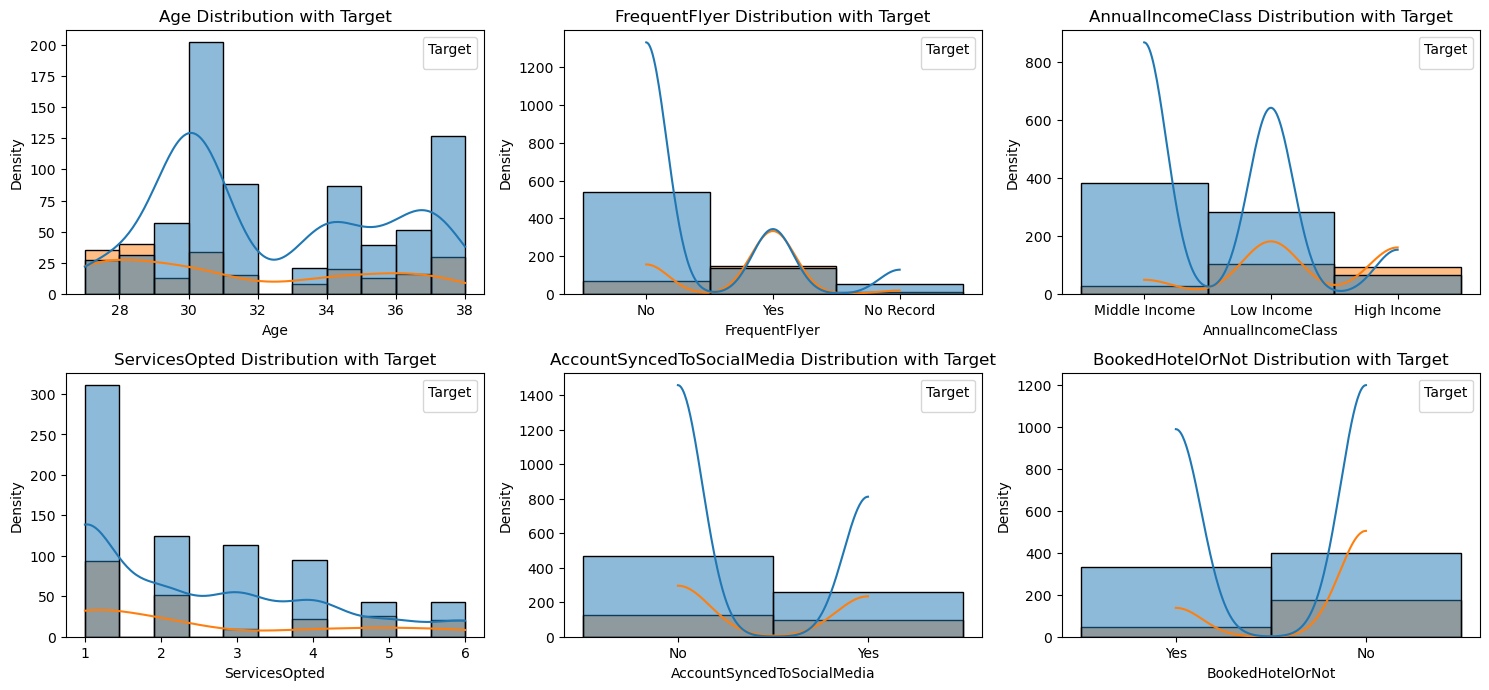

In [328]:
#Visualise the distribution of Target against other categories
import seaborn as sns
import matplotlib.pyplot as plt

# Map numerical target values to categorical labels
churn_data['Target'] = churn_data['Target'].map({1: 'Exited', 0: 'Not Exited'})

feature_cols = churn_data.columns.drop('Target')

# color palette
colors = ["#1f77b4", "#ff7f0e"]  

# Plot each variable against the target variable using barplots and distribution lines
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=churn_data, x=col, hue='Target', kde=True, palette=colors)
    plt.title(f"{col} Distribution with Target")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title='Target', loc='upper right')
plt.tight_layout()
plt.show()



In [302]:
#Make a new dataframe for our models 
churn_data = data

In [303]:
#Drop first column for AnnualIncomeClass - we seperated into High, Middle and Low income

In [ ]:
#Encode the categories to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'FrequentFlyer', 'AccountSyncedToSocialMedia', and 'BookedHotelOrNot'
churn_data['FrequentFlyer'] = label_encoder.fit_transform(churn_data['FrequentFlyer'])
churn_data['AccountSyncedToSocialMedia'] = label_encoder.fit_transform(churn_data['AccountSyncedToSocialMedia'])
churn_data['BookedHotelOrNot'] = label_encoder.fit_transform(churn_data['BookedHotelOrNot'])
# Encode 'AnnualIncomeClass'
churn_data['AnnualIncomeClass'] = label_encoder.fit_transform(churn_data['AnnualIncomeClass'])

# Encode the target variable 'Target'
churn_data['Target'] = label_encoder.fit_transform(churn_data['Target'])

churn_data.head()


In [333]:
#Examine correlation
churn_data.corr()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
Age,1.000000,0.034671,0.053149,-0.012422,-0.016367,0.024281,0.131534
FrequentFlyer,0.034671,1.000000,-0.709380,-0.164981,-0.084590,-0.189947,-0.418672
AnnualIncomeClass,0.053149,-0.709380,1.000000,0.236364,0.034744,0.250833,0.418092
ServicesOpted,-0.012422,-0.164981,0.236364,1.000000,-0.148655,0.155886,-0.038646
AccountSyncedToSocialMedia,-0.016367,-0.084590,0.034744,-0.148655,1.000000,-0.100104,-0.073831
BookedHotelOrNot,0.024281,-0.189947,0.250833,0.155886,-0.100104,1.000000,0.206055
Target,0.131534,-0.418672,0.418092,-0.038646,-0.073831,0.206055,1.000000


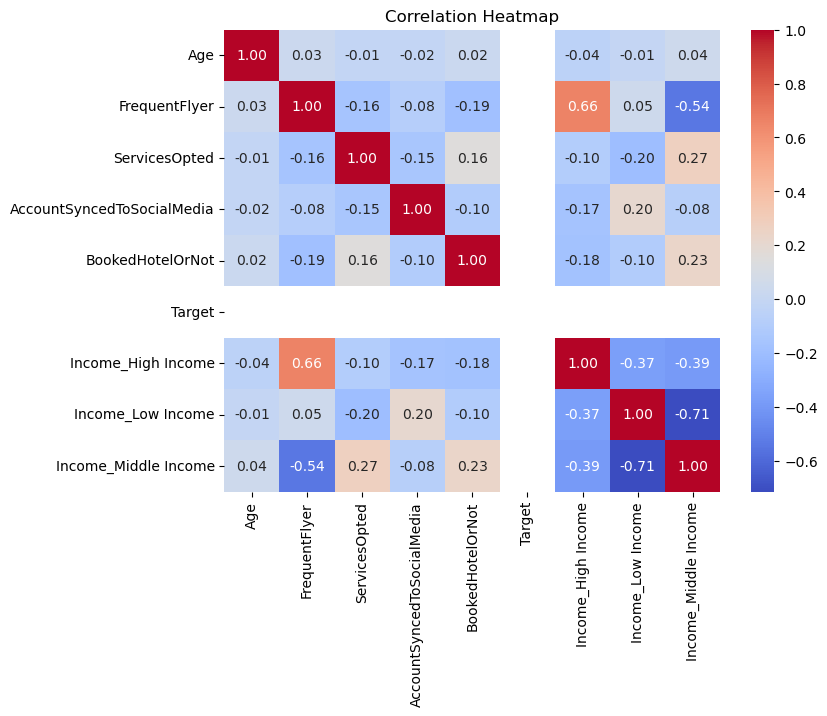

In [281]:
#Examine correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = churn_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Seperate the dataset into Target(y) and Features(X)

In [334]:
# Split the data into features (X) and target variable (y)
X = churn_data.drop('Target', axis=1)
y = churn_data['Target']

# Scale features using standardscaler

In [335]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training and Testing Sets

In [336]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise Models -Random Forest Classifier Model 

In [337]:
# Import model and libraries for evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Fit training data to model

In [338]:
#Initialise model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Use model to make prediction 

In [347]:

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Print the results
print("Predicted values:", y_pred)


Predicted values: [0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1]


## Evaluate Model

In [346]:
# Calculate counts of each class in actual and predicted values
actual_counts = pd.Series(y_test).value_counts()
predicted_counts = pd.Series(y_pred).value_counts()

# Create a DataFrame to display the counts
summary_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

print("Summary of Results:")
summary_df


Summary of Results:


,Actual,Predicted
1,153,159
0,38,32


In [341]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[ 23  15]
 [  9 144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66        38
           1       0.91      0.94      0.92       153

    accuracy                           0.87       191
   macro avg       0.81      0.77      0.79       191
weighted avg       0.87      0.87      0.87       191


Accuracy Score: 0.8743455497382199


In [2]:
#tabulate Results
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score

# Calculate classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the table
print(tabulate(class_report_df, headers='keys', tablefmt='fancy_grid'))

# Print accuracy score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


NameError: name 'y_test' is not defined

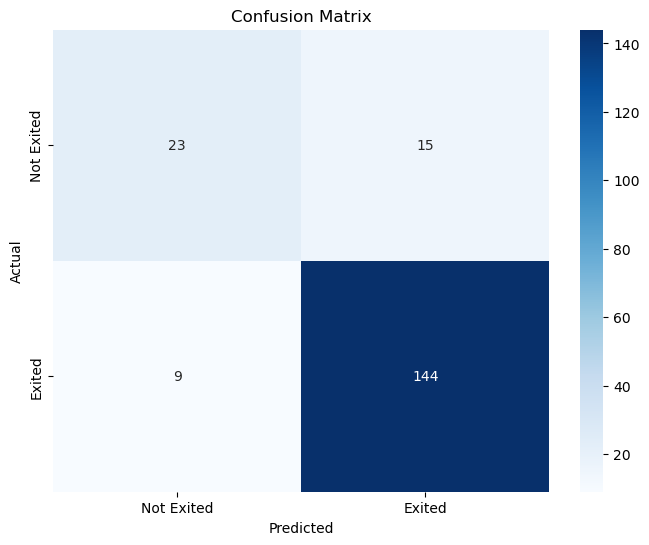

In [351]:
#Confision Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
conf_matrix = [[23, 15], [9, 144]]

# Define class labels
class_labels = ['Not Exited', 'Exited']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluation Metrics

# Feature Importance

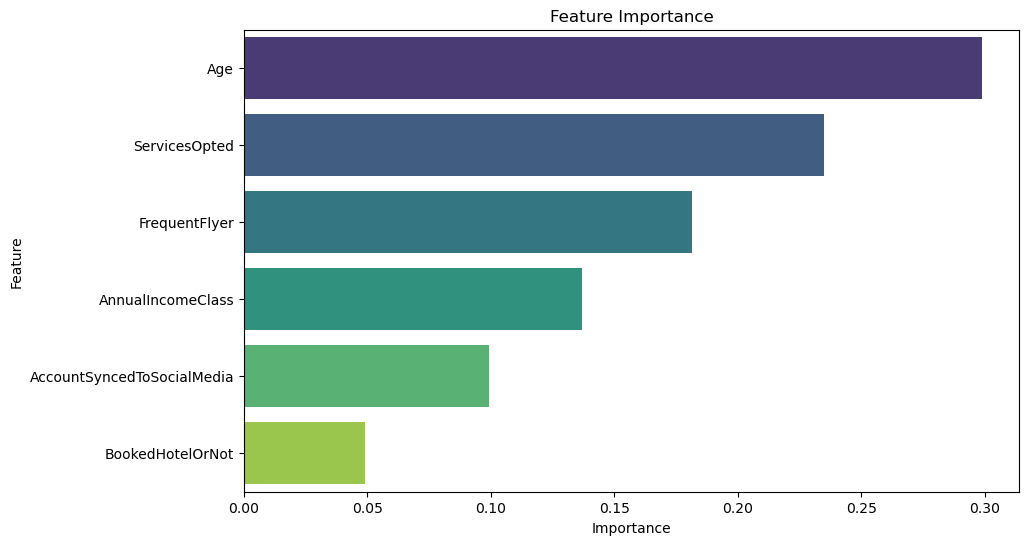

In [352]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Comparitive Models 

In [353]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))



Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        38
           1       0.93      0.95      0.94       153

    accuracy                           0.90       191
   macro avg       0.85      0.83      0.84       191
weighted avg       0.90      0.90      0.90       191


Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62        38
           1       0.89      0.94      0.92       153

    accuracy                           0.86       191
   macro avg       0.80      0.75      0.77       191
weighted avg       0.86      0.86      0.86       191


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.80      1.00      0.89       153

    accuracy                           0.80       191
   macro avg       0.40      0.50      0.44       191
weighted av

## Evaluate Comparative Models

In [354]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Initialize empty lists to store evaluation metrics
models = []
precisions = []
recalls = []
f1_scores = []
supports = []
accuracies = []

# Train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store metrics in lists
    models.append(name)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    supports.append(report['accuracy'])
    accuracies.append(report['accuracy'])

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': models,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'Accuracy': accuracies
})

# Display the results DataFrame
print(results_df)


                    Model  Precision    Recall  F1-Score  Accuracy
0           Decision Tree   0.898041  0.900524  0.898962  0.900524
1     Logistic Regression   0.855732  0.863874  0.857601  0.863874
2  Support Vector Machine   0.641676  0.801047  0.712559  0.801047
3           Random Forest   0.868474  0.874346  0.870169  0.874346
4     K-Nearest Neighbors   0.861330  0.863874  0.862477  0.863874


# Compare Feature Importance by Other Models

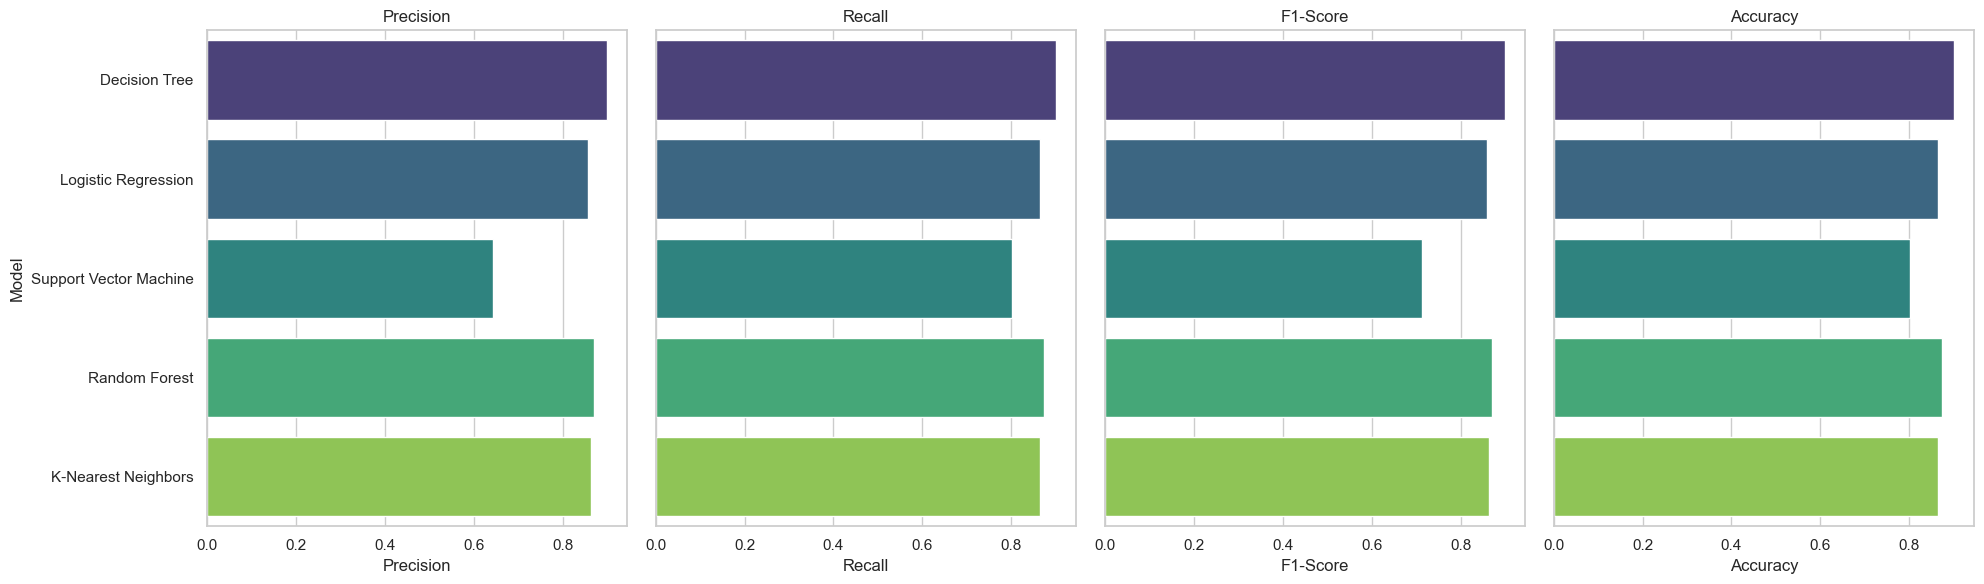

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6), sharey=True)

# Plot precision
sns.barplot(x='Precision', y='Model', data=results_df, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Precision')
axes[0].set_ylabel('Model')
axes[0].set_title('Precision')

# Plot recall
sns.barplot(x='Recall', y='Model', data=results_df, ax=axes[1], palette='viridis')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('')
axes[1].set_title('Recall')

# Plot F1-score
sns.barplot(x='F1-Score', y='Model', data=results_df, ax=axes[2], palette='viridis')
axes[2].set_xlabel('F1-Score')
axes[2].set_ylabel('')
axes[2].set_title('F1-Score')

# Plot accuracy
sns.barplot(x='Accuracy', y='Model', data=results_df, ax=axes[3], palette='viridis')
axes[3].set_xlabel('Accuracy')
axes[3].set_ylabel('')
axes[3].set_title('Accuracy')

plt.tight_layout()
plt.show()


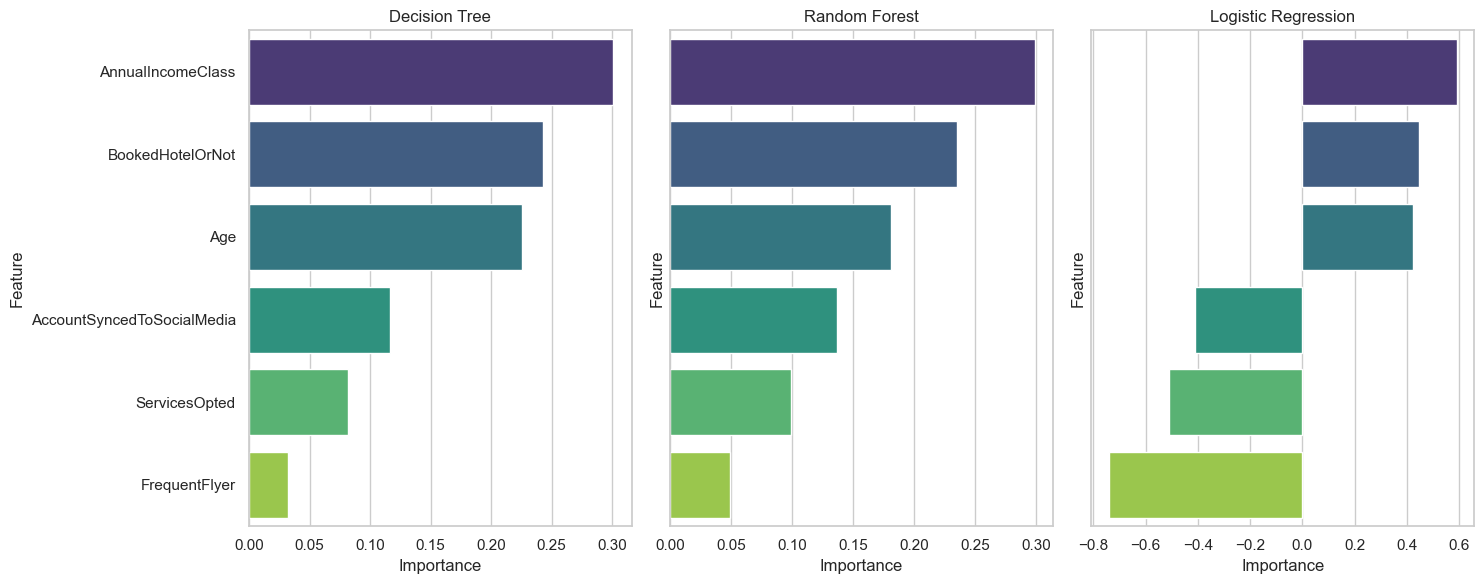

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Create subplots for each classifier
fig, axes = plt.subplots(nrows=1, ncols=len(classifiers), figsize=(15, 6), sharey=True)

# Iterate over each classifier
for idx, (name, clf) in enumerate(classifiers.items()):
    # Fit the classifier
    if name == "Logistic Regression":
        clf.fit(X_train_scaled, y_train)
    else:
        clf.fit(X_train, y_train)
    
    # Get feature importances or coefficients
    if name in ["Decision Tree", "Random Forest"]:
        feature_importances = clf.feature_importances_
    elif name == "Logistic Regression":
        feature_importances = clf.coef_[0]
    
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })
    
    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot the feature importances
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, ax=axes[idx], palette='viridis')
    axes[idx].set_xlabel('Importance')
    axes[idx].set_ylabel('Feature')
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()


## Model Optimisation Techniques

In [ ]:
#Re-train models with best parameters using GridSearch or Random to Search for Best Parameters

In [ ]:
#Using SMOTE for normalising data